In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [4]:
df=pd.read_csv(r"C:\Users\user2\Downloads\Fraud_Analysis_Dataset.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
df["isFraud"].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
print(df.columns.tolist())

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [11]:
df.shape[0]

11142

In [12]:
round((df["isFraud"].value_counts()[1]/ df.shape[0])*100,2)

10.25

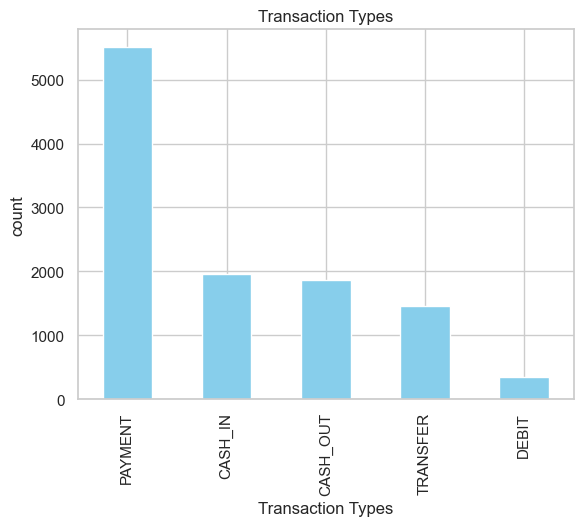

In [13]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="skyblue")
plt.xlabel("Transaction Types")  # Fixed: removed extra quote
plt.ylabel("count")
plt.show()  # Fixed: removed the "90" at the end

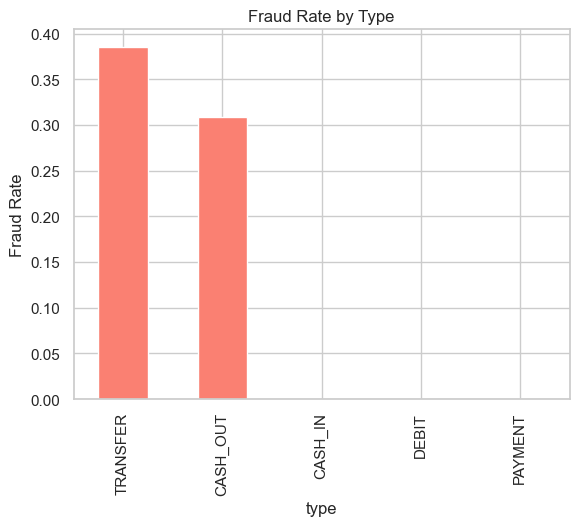

In [14]:
fraud_by_type = df.groupby("type") ["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type" , color="salmon")
plt.ylabel("Fraud Rate")
plt.show()         

In [15]:
df["amount"].describe().astype(int)

count       11142
mean       213191
std        760065
min             2
25%          4946
50%         16761
75%        154336
max      10000000
Name: amount, dtype: int32

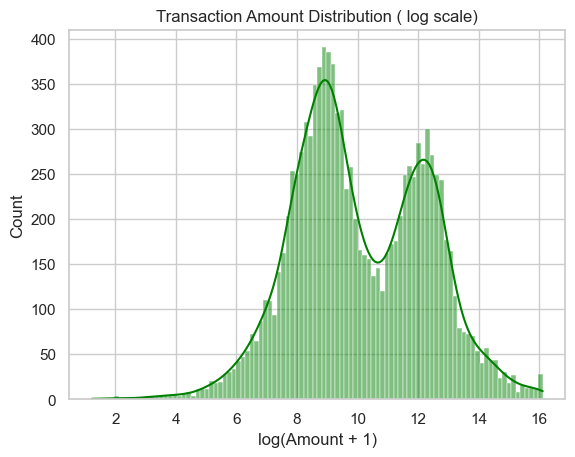

In [16]:
sns.histplot(np.log1p(df["amount"]),bins=100, kde= True, color = "green")
plt.title("Transaction Amount Distribution ( log scale)")
plt.xlabel("log(Amount + 1)")
plt.show()

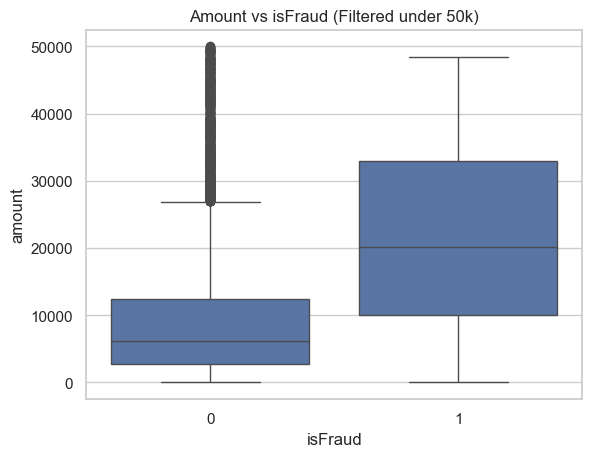

In [17]:
sns.boxplot(data=df[df["amount"] <50000],x= "isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [19]:
df["balanceDiffOring"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [20]:
(df["balanceDiffOring"] < 0).sum()

1921

In [21]:
(df["balanceDiffDest"] < 0).sum()

2201

In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOring,balanceDiffDest
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


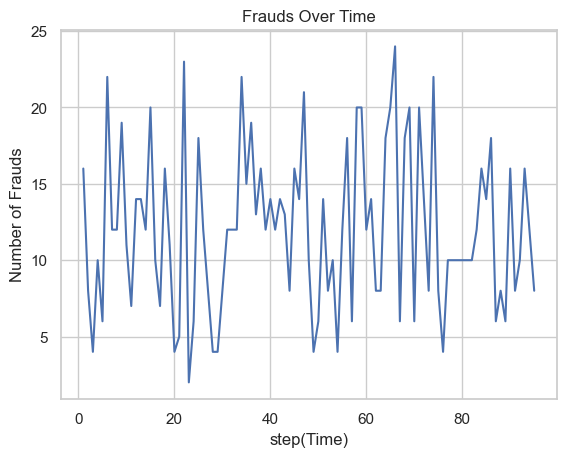

In [23]:
frauds_per_step =df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values , label="Fraud per step")
plt.xlabel("step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [24]:
df.drop(columns="step", inplace=True)

In [25]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOring,balanceDiffDest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [26]:
top_senders= df["nameOrig"].value_counts().head(10)

In [27]:
top_senders

nameOrig
C1305486145    1
C479078480     1
C1602363550    1
C1365013293    1
C1525186016    1
C1364051444    1
C2049210129    1
C1225830367    1
C1984803180    1
C1170952967    1
Name: count, dtype: int64

In [31]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [32]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [33]:
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOring,balanceDiffDest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [34]:
fraud_types["type"].value_counts()

type
CASH_OUT    1871
TRANSFER    1464
Name: count, dtype: int64

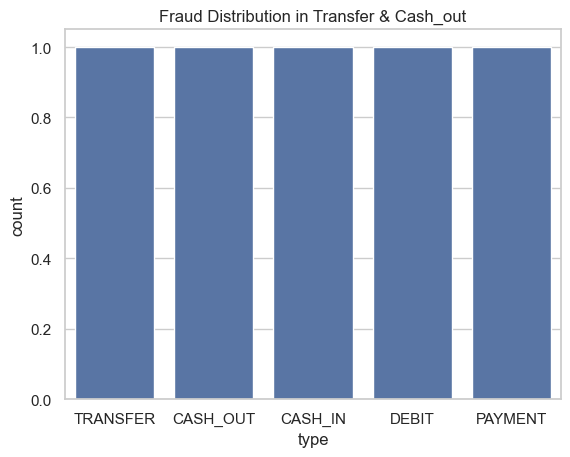

In [35]:
# Option 1: Convert Series to DataFrame first
fraud_df = fraud_by_type.reset_index()
sns.countplot(data=fraud_df, x="type")  # Note: lowercase 'x'
plt.title("Fraud Distribution in Transfer & Cash_out")
plt.show()

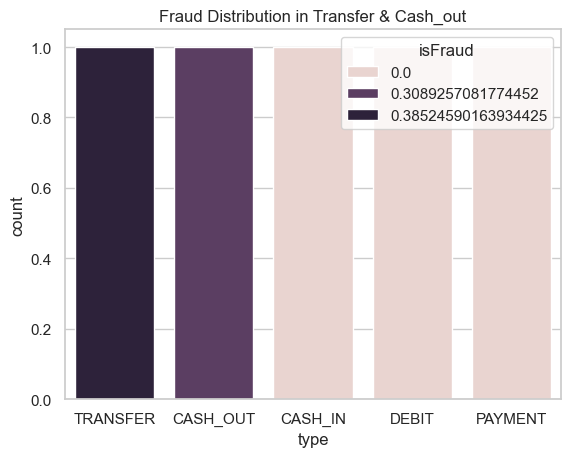

In [36]:
fraud_df = fraud_by_type.reset_index()
sns.countplot(data=fraud_df, x="type", hue="isFraud")  # Added hue parameter
plt.title("Fraud Distribution in Transfer & Cash_out")
plt.show()

In [37]:
corr = df[["amount","oldbalanceDest","newbalanceOrig","oldbalanceDest","newbalanceDest"]].corr()

corr

In [38]:
corr

,amount,oldbalanceDest,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,0.094117,-0.007816,0.094117,0.227413
oldbalanceDest,0.094117,1.000000,0.234148,1.000000,0.928831
newbalanceOrig,-0.007816,0.234148,1.000000,0.234148,0.190314
oldbalanceDest,0.094117,1.000000,0.234148,1.000000,0.928831
newbalanceDest,0.227413,0.928831,0.190314,0.928831,1.000000


In [39]:
import matplotlib.pyplot as plt
plt.clf()  # Clears the current figure


<Figure size 640x480 with 0 Axes>

In [40]:
from IPython.display import clear_output
clear_output(wait=True)


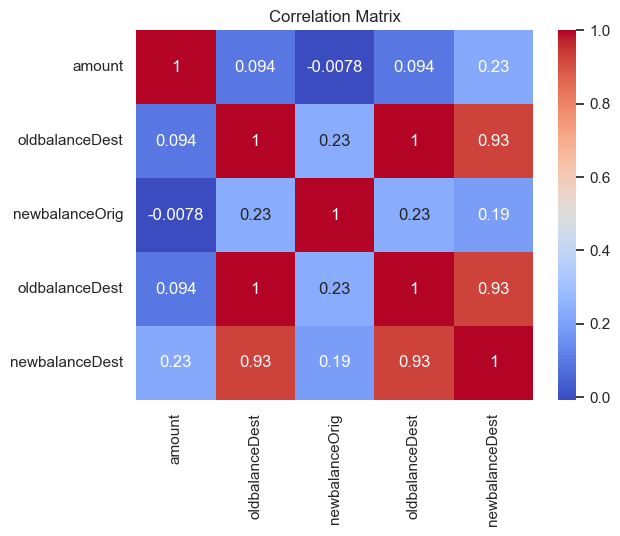

In [41]:
sns.heatmap(corr,annot=True,cmap= "coolwarm" )
plt.title("Correlation Matrix") 
plt.show()

In [42]:
zero_after_transfer = df[
    (df["oldbalanceOrg"]>0)&
    (df["newbalanceOrig"]==0)&
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [43]:
len(zero_after_transfer)

1791

In [44]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOring,balanceDiffDest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [45]:
df["isFraud"].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

In [46]:
    from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [47]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOring,balanceDiffDest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [48]:
df_model = df.drop(["nameOrig","nameDest","isFraud"],axis =1)

In [49]:
# See all column names in your DataFrame
print(df.columns.tolist())

['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'balanceDiffOring', 'balanceDiffDest']


In [50]:
# Only drop columns that exist
columns_to_drop = ["nameOrig", "nameDesk", "isFlaggedFraud"]
existing_columns = [col for col in columns_to_drop if col in df.columns]
df_model = df.drop(existing_columns, axis=1)

In [51]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOring,balanceDiffDest
0,TRANSFER,181.0,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [52]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","newbalanceOrig","newbalanceDest"]

In [53]:
y = df_model["isFraud"]
x = df_model.drop("isFraud",axis=1)

In [54]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,stratify=y)

In [55]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [57]:
    pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'newbalanceOrig',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [58]:
y_pred= pipeline.predict(x_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3000
           1       0.44      0.99      0.61       343

    accuracy                           0.87      3343
   macro avg       0.72      0.92      0.76      3343
weighted avg       0.94      0.87      0.89      3343



In [60]:
confusion_matrix(y_test,y_pred)

array([[2567,  433],
       [   5,  338]], dtype=int64)

In [61]:
pipeline.score(x_test,y_test)*100

86.89799581214479

In [62]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']